In [53]:
#大製造公司的實例：

#分析方法：
#利用前面學習的諸多函式如樞紐表和交叉表來立即顯示費用分析的數據。
#例如：活用Groupy,pivot樞紐分析，crosstab交叉表三種工具來進行實務上的分析工作。

# 思考:
#1. 只要有二個項目進行矩陣分析，用Groupy即可。
#2. 不要任意轉換空值，因為空值是有意義的。如品質指標QAIndex,在某一月份綠燈狀況下，會出現月份值（例如：9表示9月），但紅燈出現空值NaN
#    這是正常的，因為不可能在紅燈及綠燈都同是有數字。所以大土中資料處理中，不要任意轉換空值（fill_value=0）。
#3. 列出原始資料，在第一列，是很好的習慣，這樣可以檢查是否數值有異常，例如，啟動AI管理，應該同時AI部門費用會同時增加。如果列出AI部門
#   費用，可一目瞭然看出費用起伏的狀況。

# 經驗：
#1. 樞紐表(pivot)可以轉換成交叉表(crosstab), （設定margins参數即可），如果沒有時間，就直接用樞紐表(pivot_table)吧。
#2. 樞紐表和交叉表的差異：pivot_table（）是dataframe下的方法，crosstab是pandas下的方法。如此而已，其實使用上根本沒有差別。
#3. 創建樞紐表的方法pivot(),参數和交叉圖corsstab的方法大約一致，但是是属於pandas下的函數。

In [54]:
# 1. 導入模組及資料庫

In [55]:
import pandas as pd

#Dataframe顯示設定
pd.set_option("display.max_colwidth", 13)    #單一資料欄位內容顯示之長度
pd.set_option("display.max_rows", 5)               #最多顯示多少筆資料
pd.set_option("display.max_columns", 12)           #最多顯示多少個欄位

df = pd.read_csv("factory/FABExp.csv", encoding="utf8")  
display(df)

,date,月份,星期,淡旺季,LeadTime,QAIndex,...,財務部,管理部,業務一部,業務二部,深圳總產能下之總費用,CapaUtilization
0,2019/8/1,8,4,旺季,急單,紅,...,"29,085.000","88,243.000","33,493.000","45,250.000","50,000,00...",86.02%
1,2019/8/2,8,5,旺季,急單,紅,...,"33,499.000","86,518.000","27,652.000","44,417.000","50,000,00...",83.12%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,2020/9/10,9,4,淡季,計劃,綠,...,"24,250.000","2,082,039...","36,669.000","45,643.000","50,000,00...",73.14%
407,2020/9/11,9,5,淡季,計劃,綠,...,"22,053.000","2,189,217...","29,602.000","44,713.000","50,000,00...",75.01%


LeadTime: 訂單急迫性， QAIndex: 品質指標，CapaUtilization: 產能利用率

In [56]:
#2. 基本資料分析：describe, info
#include='all': 顯示所有欄位，
#percentiles=[.25, .5, .75]: 回傳25％,50％,75％。

In [57]:
#Dataframe顯示設定
pd.set_option("display.max_colwidth", 13)  #單一資料欄位內容顯示之長度
# pd.set_option("max_rows", 14)              #最多顯示多少筆資料
# pd.set_option("max_columns", 11)          #最多顯示多少個欄位

df.describe(include='all',percentiles=[.25, .5, .75]) #回傳25％,50％,75％

,date,月份,星期,淡旺季,LeadTime,QAIndex,...,財務部,管理部,業務一部,業務二部,深圳總產能下之總費用,CapaUtilization
count,408,408.0,408.0,408,408,408,...,408,408,408,408,408,408
unique,408,NaN,NaN,2,2,2,...,341,407,350,326,1,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,NaN,9.0,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,12.0,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# 3. 資料純化：用最簡易方法，排除所有分析後為NaN值

In [59]:
df.describe()

,月份,星期
count,408.000000,408.000000
mean,6.693627,4.002451
...,...,...
75%,9.000000,6.000000
max,12.000000,7.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             408 non-null    object
 1   月份               408 non-null    int64 
 2   星期               408 non-null    int64 
 3   淡旺季              408 non-null    object
 4   LeadTime         408 non-null    object
 5   QAIndex          408 non-null    object
 6   AI啟動             408 non-null    object
 7   龍華一廠             408 non-null    object
 8   龍華二廠             408 non-null    object
 9   龍華三廠             408 non-null    object
 10  LCM廠             408 non-null    object
 11  觀瀾廠              408 non-null    object
 12  模具部              408 non-null    object
 13  製工部              408 non-null    object
 14  製程部              408 non-null    object
 15  QA部              408 non-null    object
 16  AI部              408 non-null    object
 17  總經理室             408 non-null    ob

In [61]:
#Groupby:
#参數設定:
#columns: 表示要以此作為樞紐表的列
#index: 表示以此作為樞紐表的行索引
#values: 表示需要以此進行求和、求平均等一系列操作的列
#aggfunc: 可以是一個聚合操作也可以是多個聚合操作，以列表形式
#fill_value: 當值為空值NaN時的替代值
#margins: 於各行各列分别進行aggfunc操作
#margins_name: 當margins為True時，margins_name默認為'all'

In [62]:
#4. 觀察一整年(2019/9/1~2020/8/31)中各廠交期(LeadTime)，和品質(QAIndex)的整體狀況:
# 各廠區的急單生產及計劃生產完全一致，表示這五個廠及所有相關部門都在服務同一個客戶或製造同一個產品。
# 這與實際情況相符，因為這個大企業的華南廠區確實是在服務同一個國際手機品牌客戶。
# 這個廠區的品質指標（紅燈,綠燈）與LeadTime(急單生產，計劃生產)相比；31.7%品質指標為紅燈，表示品質不錯。

In [63]:
df.groupby(['LeadTime','QAIndex']).count()

date   月份   星期  淡旺季  AI啟動  龍華一廠  ...  財務部  管理部  業務一部  業務二部  \
LeadTime QAIndex                                   ...                         
急單       紅          47   47   47   47    47    47  ...   47   47    47    47   
         綠         209  209  209  209   209   209  ...  209  209   209   209   
計劃       紅          31   31   31   31    31    31  ...   31   31    31    31   
         綠         121  121  121  121   121   121  ...  121  121   121   121   

                  深圳總產能下之總費用  CapaUtilization  
LeadTime QAIndex                               
急單       紅                47            47     
         綠               209           209     
計劃       紅                31            31     
         綠               121           121     

[4 rows x 22 columns]

In [64]:
#5. 觀察一整年(2019/9/1~2020/8/31)中按月份各廠交期(LeadTime)，和品質(QAIndex)的整體狀況:
# 各廠區的急單生產及計劃生產完全一致，表示這五個廠及所有相關部門都在服務同一個客戶或製造同一個產品。
# 這與實際情況相符，因為這個大企業的華南廠區確實是在服務同一個國際手機品牌客戶。
# 這個廠區的品質指標（紅燈,綠燈）與LeadTime(急單生產，計劃生產)相比；31.7%品質指標為紅燈，表示品質不錯。

In [65]:
#Dataframe顯示設定
pd.set_option("display.max_colwidth", 13)  #單一資料欄位內容顯示之長度
pd.set_option("display.max_rows", 5)              #最多顯示多少筆資料
pd.set_option("display.max_columns", 11)          #最多顯示多少個欄位

df.groupby(['月份','QAIndex']).count()

date  星期  淡旺季  LeadTime  AI啟動  ...  管理部  業務一部  業務二部  深圳總產能下之總費用  \
月份 QAIndex                                 ...                                
1  紅           6   6    6         6     6  ...    6     6     6           6   
   綠          25  25   25        25    25  ...   25    25    25          25   
...          ...  ..  ...       ...   ...  ...  ...   ...   ...         ...   
12 紅           6   6    6         6     6  ...    6     6     6           6   
   綠          25  25   25        25    25  ...   25    25    25          25   

            CapaUtilization  
月份 QAIndex                   
1  紅                   6     
   綠                  25     
...                  ...     
12 紅                   6     
   綠                  25     

[24 rows x 22 columns]

In [66]:
#6. 觀察一整年(2019/9/1~2020/8/31)中各月份，和品質(QAIndex)的整體狀況::
# 各廠區按月份品質指標完全一致，表示這五個廠及所有相關部門都在服務同一個客戶或製造同一個產品。
# 這與實際情況相符，因為這個大企業的華南廠區確實是在服務同一個國際手機品牌客戶。
# 這個廠區的品質指標（紅燈,綠燈）與月份對比；24%品質指標為紅燈，表示品質不錯。

In [67]:
df.groupby(['月份','QAIndex']).count()

date  星期  淡旺季  LeadTime  AI啟動  ...  管理部  業務一部  業務二部  深圳總產能下之總費用  \
月份 QAIndex                                 ...                                
1  紅           6   6    6         6     6  ...    6     6     6           6   
   綠          25  25   25        25    25  ...   25    25    25          25   
...          ...  ..  ...       ...   ...  ...  ...   ...   ...         ...   
12 紅           6   6    6         6     6  ...    6     6     6           6   
   綠          25  25   25        25    25  ...   25    25    25          25   

            CapaUtilization  
月份 QAIndex                   
1  紅                   6     
   綠                  25     
...                  ...     
12 紅                   6     
   綠                  25     

[24 rows x 22 columns]

In [68]:
#7.分析工廠和AI啟動的關係：
#分析龍華一廠,AI啟動與否與每月費用之矩陣分析。
#values是作交叉運算用，故要有二個項目，而columns是作平行參考用，故只能有一個項目。
#表中是「AI啟動」的月份。
#AI啟動，造成龍華一廠費用增加，說明AI啟動並沒降低費用，而是大幅增加生產量。

In [69]:
df.pivot_table(values=['LeadTime','月份'], index=['AI啟動'], columns='龍華一廠')

月份                                                      ...  \
龍華一廠 1,020,388.000 1,042,796.000 1,123,091.000 320,756.000 321,118.000  ...   
AI啟動                                                                    ...   
OFF            NaN           NaN           NaN         5.0         5.0  ...   
ON             8.0           9.0           8.0         NaN         NaN  ...   

                                                                  
龍華一廠 910,245.000 917,685.000 947,436.000 954,052.000 968,241.000  
AI啟動                                                              
OFF          NaN         NaN         NaN         NaN         NaN  
ON           8.0         8.0         9.0         8.0        10.0  

[2 rows x 408 columns]

In [70]:
#8.分析間接部門和AI啟動的關係：
#分析龍華一廠,AI啟動與否與每月費用之矩陣分析。
#values是作交叉運算用，故要有二個項目，而columns是作平行參考用，故只能有一個項目。
#表中是AI啟動的月份。
# AI啟動與月份無關，無論那一個月啟動AI不是影響費用的重點。

In [71]:
df.pivot_table(values=['LeadTime','月份'], index=['AI啟動'], columns='AI部')

月份                                              ...            \
AI部  10,250.000 10,355.000 10,378.000 10,601.000 10,603.000  ... 9,645.000   
AI啟動                                                         ...             
OFF         NaN        NaN        NaN        NaN        NaN  ...       NaN   
ON          8.0       11.0       10.0        8.0        9.0  ...      10.0   

                                              
AI部  9,738.000 9,745.000 9,774.000 9,957.000  
AI啟動                                          
OFF        NaN       NaN       NaN       NaN  
ON        10.0      12.0      11.0       9.0  

[2 rows x 397 columns]

In [72]:
#9.LCM廠,品質燈號QAIndex與每月費用之矩陣分析：
# LCM廠費用和品質指標有關，如果是品質綠燈費用明顯較低。

In [73]:
df.pivot_table(values=['LeadTime','月份'], index=['QAIndex'], columns='LCM廠')

月份                                               \
LCM廠    19,810,388.000 20,028,302.000 20,248,614.000 20,471,348.000   
QAIndex                                                               
紅                 NaN            NaN            NaN            NaN    
綠                 5.0            4.0            3.0            2.0    

                        ...                                               \
LCM廠    20,696,533.000  ... 27,311,730.000 27,477,742.000 27,480,844.000   
QAIndex                 ...                                                
紅                 NaN   ...           NaN            NaN            NaN    
綠                 1.0   ...           9.0            8.0            8.0    

                                       
LCM廠    27,563,219.000 27,612,159.000  
QAIndex                                
紅                 NaN            NaN   
綠                 8.0            8.0   

[2 rows x 408 columns]

In [74]:
# 10. 觀察淡旺季，LeadTime(交期急迫性)的狀況：
#旺季時，急單為計劃性生產的2倍，全月旺季為淡季的3.836倍(1232+436/632+431)=1.57,這個大企業集團生意真的很好。

In [75]:
monthly_pivot = df.pivot_table(columns=['淡旺季','LeadTime'],aggfunc=['sum','mean'],fill_value=0,margins=True)
monthly_pivot

sum                       ...      mean                      \
淡旺季         旺季              淡季       ...        旺季                  淡季   
LeadTime    急單   計劃   All   急單   計劃  ...        計劃       All        急單   
星期         639  287   926  360  347  ...  4.283582  4.114013  3.829787   
月份        1232  436  1668  632  431  ...  6.507463  7.056200  6.723404   

                              
淡旺季                           
LeadTime        計劃       All  
星期        4.082353  3.956070  
月份        5.070588  5.896996  

[2 rows x 12 columns]

In [76]:
# 11. 觀察月份，和LeadTime(交期急迫性)的情況：
#1月份，急單為計劃性生產的4倍，9月－12月全月都在急單生產。
#此分析結果與淡旺季有關，與月份沒有明顯相關。

In [77]:
pd.set_option("display.max_rows", 20)          #最多顯示多少個欄位
pd.set_option("display.max_columns", 30)
monthly_pivot = df.pivot_table(columns=['月份','LeadTime'], aggfunc=['sum','mean'], 
                               fill_value=0,margins=True)
monthly_pivot

sum                                                                \
月份         1            2            3            4            5              
LeadTime   急單  計劃  All  急單  計劃  All  急單  計劃  All  急單  計劃  All  急單   計劃  All   
星期        101  23  124  84  34  118  61  61  122  52  67  119  29  101  130   

          ... mean                                                             \
月份        ...   7                             8                            9    
LeadTime  ...   急單        計劃       All        急單        計劃       All       急單   
星期        ...  3.0  4.192308  3.596154  3.971429  4.222222  4.096825  4.09375   

                                                                                
月份                                  10             11             12            
LeadTime        計劃       All        急單       All   急單  All        急單       All  
星期        3.444444  3.769097  3.903226  3.903226  4.1  4.1  3.935484  3.935484  

[1 rows x 66 columns]

In [78]:
#12. 觀察星期，LeadTime(交期急迫性)的相關分析狀況：
#1月份，急單為計劃性生產的4倍，9月－12月全月都在急單生產。
#星期一是工廠最忙的時間，真的嗎？
#此分析結果與淡旺季有關，與月份無明顯相關。

In [79]:
pd.set_option("display.max_rows", 20)          #最多顯示多少個欄位
monthly_pivot=df.pivot_table(columns=['星期','LeadTime'],
                             aggfunc=['sum','mean'],
                             fill_value=0,margins=True)
monthly_pivot

sum                                                              \
星期          1              2              3              4              5   
LeadTime   急單   計劃  All   急單   計劃  All   急單   計劃  All   急單   計劃  All   急單   
月份        280  111  391  271  122  393  268  116  384  263  129  392  262   

                    ...      mean                                          \
星期                  ...         3                             4             
LeadTime   計劃  All  ...        急單        計劃       All        急單        計劃   
月份        132  394  ...  6.871795  6.105263  6.488529  7.108108  5.863636   

                                                                        \
星期                         5                         6                   
LeadTime       All        急單    計劃       All        急單    計劃       All   
月份        6.485872  7.705882  5.28  6.492941  7.210526  5.65  6.430263   

                                      
星期             7                      
LeadTime      急單        計劃       All  
月份        7.6875  5.538462  6.612981  

[1 rows x 42 columns]

In [80]:
# 13.觀察QAIndex(品質)，LeadTime(交期急迫性)的狀況：
#品質指標在紅燈(警示狀況下)，製工部的費用也同步增加，表示品質指標在紅燈時，防錯的工作非常繁重
#（費用發生在製造工程部，表示一大群工程師在日以繼夜的處理品質不良的警示情況），這是好現象嗎？
# 不論紅綠燈，急單生產或計劃性生產的比率差不多（急單:計劃大約2:1),表示訂單急迫與否並不影響品質，急單只是生產作業先後問題不是品質影響因素。

pd.set_option("display.max_rows", 20)          #最多顯示多少個欄位
monthly_pivot = df.pivot_table(columns=['QAIndex','LeadTime'], 
                               aggfunc=['sum','mean'], 
                               fill_value=0,margins=True)
monthly_pivot

sum                                 mean                      \
QAIndex     紅               綠                    紅                       
LeadTime   急單   計劃  All    急單   計劃   All        急單        計劃       All   
星期        177  135  312   822  499  1321  3.765957  4.354839  4.060398   
月份        365  158  523  1499  709  2208  7.765957  5.096774  6.431366   

                                        
QAIndex          綠                      
LeadTime        急單        計劃       All  
星期        3.933014  4.123967  4.028491  
月份        7.172249  5.859504  6.515876

In [81]:
#8. 專案結論：

#專業智慧製造分析：

#1.淡季和旺季，與品質系統指標(QAIndex)是否相關。
#淡旺季和品質系統指標(QAIndex)關係變化，並沒有明顯差異。可能淡季有較多時間進行不良品維修等，故稍微拉低品質水準。
#各廠一致性高，而一年有75%時間處在旺季中，顯示生意很好，訂單暢旺。

In [82]:
import numpy as np

# 複製一份副本 DataFrame
df_change1 = df.copy()

print("原始檔案：")
display(df_change1.head())
columns = df_change1.columns.tolist()[:4] #只留下4個欄位
# 創建新的欄位名稱「IndexNo]
new_col = 'IndexNo'

columns.insert(2, new_col)  # 將新欄位放在編號2的欄位
df_change1[new_col] = df_change1.QAIndex.apply(lambda x: '1' if x else '2')
print("用apply函數增加欄位「IndexNo」之後，檔案改成：")
display(df_change1)
df.pivot_table(values=['月份'], index=['淡旺季'], columns='QAIndex')

原始檔案：


,date,月份,星期,淡旺季,LeadTime,QAIndex,AI啟動,龍華一廠,龍華二廠,龍華三廠,LCM廠,觀瀾廠,模具部,製工部,製程部,QA部,AI部,總經理室,財務部,管理部,業務一部,業務二部,深圳總產能下之總費用,CapaUtilization
0,2019/8/1,8,4,旺季,急單,紅,ON,"757,596.000","2,869,755...","11,056,10...","26,991,29...","1,335,383...","32,456.000","17,977.000","54,250.000","81,386.000","13,531.000","3,123.000","29,085.000","88,243.000","33,493.000","45,250.000","50,000,00...",86.02%
1,2019/8/2,8,5,旺季,急單,紅,ON,"746,413.000","2,785,665...","10,719,65...","26,007,94...","1,301,762...","41,616.000","29,663.000","64,984.000","74,592.000","18,647.000","3,329.000","33,499.000","86,518.000","27,652.000","44,417.000","50,000,00...",83.12%
2,2019/8/3,8,6,旺季,急單,綠,ON,"701,001.000","2,457,011...","11,441,96...","26,855,03...","1,169,504...","21,723.000","6,761.000","38,342.000","78,186.000","7,780.000","3,357.000","28,964.000","86,549.000","40,356.000","46,059.000","50,000,00...",85.25%
3,2019/8/4,8,7,旺季,急單,綠,ON,"712,124.000","2,535,601...","11,007,73...","24,816,71...","1,201,262...","20,300.000","5,562.000","38,039.000","76,472.000","7,374.000","3,582.000","32,040.000","84,827.000","27,047.000","44,321.000","50,000,00...",80.55%
4,2019/8/5,8,1,旺季,急單,紅,ON,"840,953.000","3,536,009...","9,479,498...","23,076,85...","1,599,146...","26,755.000","11,143.000","54,912.000","83,633.000","11,580.000","3,305.000","20,738.000","55,380.000","72,060.000","48,577.000","50,000,00...",77.06%


用apply函數增加欄位「IndexNo」之後，檔案改成：


,date,月份,星期,淡旺季,LeadTime,QAIndex,AI啟動,龍華一廠,龍華二廠,龍華三廠,LCM廠,觀瀾廠,模具部,製工部,製程部,QA部,AI部,總經理室,財務部,管理部,業務一部,業務二部,深圳總產能下之總費用,CapaUtilization,IndexNo
0,2019/8/1,8,4,旺季,急單,紅,ON,"757,596.000","2,869,755...","11,056,10...","26,991,29...","1,335,383...","32,456.000","17,977.000","54,250.000","81,386.000","13,531.000","3,123.000","29,085.000","88,243.000","33,493.000","45,250.000","50,000,00...",86.02%,1
1,2019/8/2,8,5,旺季,急單,紅,ON,"746,413.000","2,785,665...","10,719,65...","26,007,94...","1,301,762...","41,616.000","29,663.000","64,984.000","74,592.000","18,647.000","3,329.000","33,499.000","86,518.000","27,652.000","44,417.000","50,000,00...",83.12%,1
2,2019/8/3,8,6,旺季,急單,綠,ON,"701,001.000","2,457,011...","11,441,96...","26,855,03...","1,169,504...","21,723.000","6,761.000","38,342.000","78,186.000","7,780.000","3,357.000","28,964.000","86,549.000","40,356.000","46,059.000","50,000,00...",85.25%,1
3,2019/8/4,8,7,旺季,急單,綠,ON,"712,124.000","2,535,601...","11,007,73...","24,816,71...","1,201,262...","20,300.000","5,562.000","38,039.000","76,472.000","7,374.000","3,582.000","32,040.000","84,827.000","27,047.000","44,321.000","50,000,00...",80.55%,1
4,2019/8/5,8,1,旺季,急單,紅,ON,"840,953.000","3,536,009...","9,479,498...","23,076,85...","1,599,146...","26,755.000","11,143.000","54,912.000","83,633.000","11,580.000","3,305.000","20,738.000","55,380.000","72,060.000","48,577.000","50,000,00...",77.06%,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2020/9/7,9,1,淡季,計劃,綠,OFF,"414,314.000","858,282.000","9,322,099...","25,791,88...","493,251.000","15,459.000","2,379.000","15,105.000","66,589.000","2,979.000","2,752.000","21,599.000","1,856,895...","29,615.000","44,715.000","50,000,00...",73.76%,1
404,2020/9/8,9,2,淡季,計劃,綠,OFF,"384,731.000","740,091.000","10,069,56...","26,093,26...","439,063.000","16,235.000","3,242.000","14,490.000","66,589.000","3,146.000","2,672.000","24,299.000","2,002,566...","36,663.000","45,642.000","50,000,00...",75.45%,1
405,2020/9/9,9,3,淡季,計劃,綠,OFF,"364,010.000","662,515.000","9,710,089...","26,944,68...","402,843.000","15,494.000","2,418.000","12,683.000","66,589.000","2,628.000","2,788.000","21,355.000","2,008,192...","29,604.000","44,713.000","50,000,00...",76.17%,1
406,2020/9/10,9,4,淡季,計劃,綠,OFF,"351,813.000","618,860.000","9,322,098...","25,895,54...","382,193.000","15,492.000","2,416.000","12,123.000","66,589.000","2,543.000","2,597.000","24,250.000","2,082,039...","36,669.000","45,643.000","50,000,00...",73.14%,1


月份          
QAIndex         紅         綠
淡旺季                        
旺季       7.255814  7.290323
淡季       6.028571  5.916667

In [83]:
df.groupby(['淡旺季','QAIndex']).count()

date   月份   星期  LeadTime  AI啟動  龍華一廠  龍華二廠  龍華三廠  LCM廠  觀瀾廠  模具部  \
淡旺季 QAIndex                                                                     
旺季  紅          43   43   43        43    43    43    43    43    43   43   43   
    綠         186  186  186       186   186   186   186   186   186  186  186   
淡季  紅          35   35   35        35    35    35    35    35    35   35   35   
    綠         144  144  144       144   144   144   144   144   144  144  144   

             製工部  製程部  QA部  AI部  總經理室  財務部  管理部  業務一部  業務二部  深圳總產能下之總費用  \
淡旺季 QAIndex                                                               
旺季  紅         43   43   43   43    43   43   43    43    43          43   
    綠        186  186  186  186   186  186  186   186   186         186   
淡季  紅         35   35   35   35    35   35   35    35    35          35   
    綠        144  144  144  144   144  144  144   144   144         144   

             CapaUtilization  
淡旺季 QAIndex                   
旺季  紅                  43     
    綠                 186     
淡季  紅                  35     
    綠                 144

In [84]:
#2. 分析良率曲線，那一個月份的品質最佳。

# 8,9月品質最佳（83%的生產日，品質指標是綠燈），原因和電子業的週期有關，8,9月計劃生產比率最高。
# 1-3月品質最差（70%的生產日，品質指標是綠燈），原因和電子業的週期有關，1-3月逢中國春節，且計劃生產比率最低。
# 從樞紐分析表（每月的急單或計劃天數）看，是否急單與廠無關。所以深圳廠區各廠品質水準表現隨月份或急單無關。
#原因是各廠都在為同一客戶服務，且產品也相同(iphone)。供應商很穩定，所以一致性高。

In [85]:
pd.set_option("display.max_rows", 12)#最多顯示多少筆資料
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df.groupby(['月份','QAIndex']).count()

date  星期  淡旺季  LeadTime  AI啟動  龍華一廠  龍華二廠  龍華三廠  LCM廠  觀瀾廠  模具部  \
月份 QAIndex                                                                    
1  紅           6   6    6         6     6     6     6     6     6    6    6   
   綠          25  25   25        25    25    25    25    25    25   25   25   
2  紅           6   6    6         6     6     6     6     6     6    6    6   
   綠          23  23   23        23    23    23    23    23    23   23   23   
3  紅           6   6    6         6     6     6     6     6     6    6    6   
   綠          25  25   25        25    25    25    25    25    25   25   25   
4  紅           6   6    6         6     6     6     6     6     6    6    6   
   綠          24  24   24        24    24    24    24    24    24   24   24   
5  紅           6   6    6         6     6     6     6     6     6    6    6   
   綠          25  25   25        25    25    25    25    25    25   25   25   
6  紅           4   4    4         4     4     4     4     4     4    4    4   
   綠          26  26   26        26    26    26    26    26    26   26   26   
7  紅           6   6    6         6     6     6     6     6     6    6    6   
   綠          25  25   25        25    25    25    25    25    25   25   25   
8  紅          12  12   12        12    12    12    12    12    12   12   12   
   綠          50  50   50        50    50    50    50    50    50   50   50   
9  紅           7   7    7         7     7     7     7     7     7    7    7   
   綠          34  34   34        34    34    34    34    34    34   34   34   
10 紅           7   7    7         7     7     7     7     7     7    7    7   
   綠          24  24   24        24    24    24    24    24    24   24   24   
11 紅           6   6    6         6     6     6     6     6     6    6    6   
   綠          24  24   24        24    24    24    24    24    24   24   24   
12 紅           6   6    6         6     6     6     6     6     6    6    6   
   綠          25  25   25        25    25    25    25    25    25   25   25   

            製工部  製程部  QA部  AI部  總經理室  財務部  管理部  業務一部  業務二部  深圳總產能下之總費用  \
月份 QAIndex                                                               
1  紅          6    6    6    6     6    6    6     6     6           6   
   綠         25   25   25   25    25   25   25    25    25          25   
2  紅          6    6    6    6     6    6    6     6     6           6   
   綠         23   23   23   23    23   23   23    23    23          23   
3  紅          6    6    6    6     6    6    6     6     6           6   
   綠         25   25   25   25    25   25   25    25    25          25   
4  紅          6    6    6    6     6    6    6     6     6           6   
   綠         24   24   24   24    24   24   24    24    24          24   
5  紅          6    6    6    6     6    6    6     6     6           6   
   綠         25   25   25   25    25   25   25    25    25          25   
6  紅          4    4    4    4     4    4    4     4     4           4   
   綠         26   26   26   26    26   26   26    26    26          26   
7  紅          6    6    6    6     6    6    6     6     6           6   
   綠         25   25   25   25    25   25   25    25    25          25   
8  紅         12   12   12   12    12   12   12    12    12          12   
   綠         50   50   50   50    50   50   50    50    50          50   
9  紅          7    7    7    7     7    7    7     7     7           7   
   綠         34   34   34   34    34   34   34    34    34          34   
10 紅          7    7    7    7     7    7    7     7     7           7   
   綠         24   24   24   24    24   24   24    24    24          24   
11 紅          6    6    6    6     6    6    6     6     6           6   
   綠         24   24   24   24    24   24   24    24    24          24   
12 紅          6    6    6    6     6    6    6     6     6           6   
   綠         25   25   25   25    25   25   25    25    25          25   

            CapaUtilization  
月份

In [86]:
pd.set_option("display.max_rows", 12)#最多顯示多少筆資料
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df.groupby(['LeadTime','QAIndex']).count()

date   月份   星期  淡旺季  AI啟動  龍華一廠  龍華二廠  龍華三廠  LCM廠  觀瀾廠  模具部  \
LeadTime QAIndex                                                                
急單       紅          47   47   47   47    47    47    47    47    47   47   47   
         綠         209  209  209  209   209   209   209   209   209  209  209   
計劃       紅          31   31   31   31    31    31    31    31    31   31   31   
         綠         121  121  121  121   121   121   121   121   121  121  121   

                  製工部  製程部  QA部  AI部  總經理室  財務部  管理部  業務一部  業務二部  深圳總產能下之總費用  \
LeadTime QAIndex                                                               
急單       紅         47   47   47   47    47   47   47    47    47          47   
         綠        209  209  209  209   209  209  209   209   209         209   
計劃       紅         31   31   31   31    31   31   31    31    31          31   
         綠        121  121  121  121   121  121  121   121   121         121   

                  CapaUtilization  
LeadTime QAIndex                   
急單       紅                  47     
         綠                 209     
計劃       紅                  31     
         綠                 121

In [87]:
df.pivot_table(index='LeadTime', 
               columns='月份', 
               values='LCM廠', 
               aggfunc=['count'])

count                                                              \
月份          1     2     3     4     5     6     7     8     9     10    11   
LeadTime                                                                     
急單        26.0  22.0  17.0  13.0   8.0   6.0   5.0  35.0  32.0  31.0  30.0   
計劃         5.0   7.0  14.0  17.0  23.0  24.0  26.0  27.0   9.0   NaN   NaN   

                
月份          12  
LeadTime        
急單        31.0  
計劃         NaN

In [88]:
#3. AI啟動和產能利用率的相關性。
#AI啟動與否決定了產能利用率。啟動AI使產能提昇25%以上，絕對是獲利的關鍵。
#AI啟動，同時增加了一些費用。每月約增700萬人民幣左右。

In [89]:
pd.set_option("display.max_rows", 12)#最多顯示多少筆資料
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df.groupby(['AI啟動','CapaUtilization']).sum()

月份  星期
AI啟動 CapaUtiliz...        
OFF  61.05%          5   4
     62.24%          4   2
     62.48%          5   5
     63.52%          3   7
     63.99%          5   1
     64.43%          5   2
     64.89%          2   5
     65.17%          4   6
     65.19%          5   2
     65.54%          4   7
     65.6%           6   5
     66.25%          4   7
     66.29%          6   6
     66.38%          1   3
     66.39%         10  11
     66.42%          3   4
     66.83%          5   3
     66.92%          5   2
     67.2%           6   2
     67.37%          9   8
     67.45%          4   4
     67.52%          5   1
     67.55%          4   3
     67.63%          5   5
     67.76%          2   2
     67.82%          5   1
     67.87%          5   7
     67.88%          4   1
     67.94%          5   7
     67.99%         12   1
     68.03%         10  12
     68.15%          5   7
     68.21%          6   3
     68.23%          6   6
     68.33%          5   1
     68.54%          7   7
     68.55%          2   3
     68.57%          3   2
     68.59%          6   2
     68.77%          8   6
     68.78%          7   6
     68.83%          4   6
     68.87%          4   3
     68.88%          6   2
     68.98%          6   4
     68.99%          3   6
     69.13%          4   5
     69.19%          1   7
     69.2%           3   5
     69.28%          4   5
     69.37%          4   6
     69.39%          4   6
     69.52%          6   6
     69.55%          6   2
     69.59%          7   3
     69.74%         11   6
     69.75%          3   7
     69.8%           1   1
     69.83%          5   2
     69.84%          7   4
     70.03%          6   3
     70.05%          5   6
     70.07%          9  12
     70.13%          7   1
     70.16%          2   4
     70.19%          3   1
     70.21%          4   3
     70.22%          3   4
     70.29%          8   3
     70.39%          9   9
     70.41%          6   4
     70.43%          2   3
     70.48%          3   3
     70.5%           3   4
     70.67%          7   3
     70.74%         17  10
     70.88%          5   4
     70.93%          7   7
     71%             1   5
     71.06%          3   4
     71.14%         12   6
     71.17%          4   7
     71.18%          8   1
     71.21%          6   7
     71.22%          7   5
     71.25%          7   3
     71.34%          6   1
     71.35%          4   4
     71.39%          1   2
     71.46%          6  10
     71.48%          7   3
     71.6%           2   6
     71.66%          2   2
     71.71%          2   2
     71.73%          2   1
     71.74%         11   9
     71.77%          3   1
     71.85%          4   3
     71.89%          7   7
     71.9%           6   1
     71.96%          7   5
     72.04%          6   2
     72.09%          8   7
     72.18%          6   3
     72.24%          5   4
     72.27%         12   6
     72.3%           8   2
     72.32%          1   3
     72.33%          6   1
     72.42%         11   3
     72.43%          7   4
     72.51%          8   5
     72.56%         11   4
     72.6%           3   5
     72.61%          5   6
     72.7%          12   7
     72.71%          7   2
     72.72%          3   2
     72.76%          6   7
     72.81%          4   4
     72.89%          1   7
     72.9%           2   2
     72.92%          8   4
     72.94%         12   2
     72.97%          8   7
     73.01%          9   6
     73.09%          9  10
     73.11%          1   4
     73.14%         21  10
     73.16%          6   9
     73.29%          7   6
     73.32%          8  11
     73.35%          6   5
     73.41%          8   6
     73.45%         11  11
     73.55%          5   7
     73.56%          7   1
     73.59%          6   4
     73.62%          8   1
     73.68%          8   6
     73.72%          4   4
     73.73%          6   1
     73.74%         12   1
     73.76%         12   8
     73.93%          8   1
     74.06%          7   2
     74.08%          7  

In [90]:
df.groupby(['AI啟動','AI部']).sum()

月份  星期
AI啟動 AI部               
OFF  2,214.000    5   6
     2,397.000    5   3
     2,405.000    4   4
     2,503.000    5   3
     2,543.000    9   4
     2,552.000    8   7
     2,569.000    8   3
     2,592.000    7   6
     2,601.000    4   1
     2,609.000    5   7
     2,621.000    3   2
     2,628.000    9   3
     2,630.000    6   2
     2,661.000    8   6
     2,672.000    5   4
     2,711.000    8   2
     2,719.000    6   5
     2,733.000    4   1
     2,745.000    6   2
     2,775.000    7   6
     2,791.000    7   5
     2,809.000    6   4
     2,813.000    6   3
     2,831.000    3   6
     2,855.000    6   1
     2,857.000    5   7
     2,863.000    2   7
     2,867.000    6   7
     2,876.000    8   5
     2,894.000    7   1
     2,902.000    9   2
     2,909.000    7   4
     2,916.000    6   1
     2,920.000    6   5
     2,921.000    5   1
     2,928.000    4   2
     2,930.000    7   3
     2,978.000    7   1
     2,979.000    9   1
     2,986.000    6   5
     2,993.000    3   6
     2,995.000    6   7
     3,000.000    7   6
     3,002.000    7   2
     3,004.000    8   3
     3,007.000    8   7
     3,075.000    7   5
     3,082.000    6   4
     3,088.000    8   4
     3,089.000    2   4
     3,091.000    5   6
     3,105.000    4   5
     3,123.000    8   7
     3,124.000    8   2
     3,127.000    5   4
     3,136.000    1   5
     3,146.000    9   2
     3,153.000    8   6
     3,185.000    7   2
     3,198.000   12  11
     3,206.000    8   7
     3,208.000    5   7
     3,212.000    4   6
     3,213.000    8   5
     3,214.000    5   2
     3,218.000    3   7
     3,228.000    6   4
     3,250.000    5   3
     3,258.000    5   2
     3,259.000   13   7
     3,265.000    6   1
     3,286.000    2   4
     3,289.000    6   6
     3,292.000    9   4
     3,303.000    6   3
     3,307.000    8   1
     3,314.000    7   3
     3,319.000    7   3
     3,321.000    7   7
     3,325.000    8   4
     3,340.000    8   1
     3,345.000    6   4
     3,374.000    9   5
     3,380.000    1   2
     3,385.000    3   3
     3,396.000    9   3
     3,410.000    4   4
     3,421.000    6   6
     3,423.000    7   4
     3,430.000    5   1
     3,433.000    4   4
     3,442.000    5   5
     3,444.000   12   3
     3,450.000    4   2
     3,456.000    4   7
     3,462.000    7   7
     3,480.000    9   6
     3,513.000    4   7
     3,515.000    7   1
     3,539.000    6   7
     3,540.000    4   5
     3,542.000   11   6
     3,545.000    2   5
     3,551.000    6   2
     3,557.000    5   5
     3,563.000    7   5
     3,591.000    4   1
     3,601.000    4   6
     3,609.000    6   3
     3,618.000    1   2
     3,619.000    6   2
     3,631.000    5   6
     3,635.000    7   4
     3,638.000    5   2
     3,660.000    4   6
     3,696.000    3   2
     3,699.000    2   1
     3,707.000    7   6
     3,709.000   12   7
     3,726.000    3   5
     3,727.000    4   3
     3,773.000    3   2
     3,778.000    8   1
     3,790.000    5   5
     3,794.000   11   1
     3,797.000    3   5
     3,801.000    4   3
     3,817.000    3   7
     3,835.000    7   3
     3,884.000    8   5
     3,910.000    5   7
     3,915.000    3   4
     3,917.000    3   5
     3,918.000    3   3
     3,978.000    3   6
     3,987.000    4   4
     3,989.000   11  14
     3,990.000    3   4
     3,994.000   12   7
     3,999.000    4   7
     4,027.000    2   3
     4,046.000    3   1
     4,055.000    1   6
     4,071.000    3   1
     4,082.000   11   5
     4,116.000    2   3
     4,138.000    5   5
     4,143.000    8   4
     4,156.000    6   6
     4,157.000    7   3
     4,185.000    2   7
     4,190.000   10   6
     4,192.000    7   7
     4,198.000    2   2
     4,209.000    4   3
     4,215.000    8   4
     4,218.000    4   5
     4,231.000    8   1
     4,234.000    2   5
     4,235.000    6   2
     4,285.000    5   1
     4,318.000    1   5
     4,340.000   12   1
     4,342.000    1   7
     4,347.000    2   1
     4,36

In [91]:
#4. AI啟動和品質系統指標的相關性。
#AI啟動並不會提高品質，甚至會降低品質。因為AI是機器人擔任生產工作，機器人進行機器學習只是減少人工費用，
#但機器人目前在該公司中並不能提高品質。

In [92]:
df.pivot_table(index='QAIndex', 
               columns='AI啟動', 
               values='龍華一廠', 
               aggfunc=['count'])

count    
AI啟動      OFF  ON
QAIndex          
紅           5  73
綠         255  75

In [93]:
#5. 組裝廠費用和產能利用率的關係。
#非常驚訝的發現，產能利用率，產能利用率與費用沒有絕對相關，可見工廠都有基本費用，就算產能利用率不高，
#也要支付基本費用。
#但產能利用率超過85%,就有明顯的線性相關。

In [94]:
df.groupby(['龍華二廠','CapaUtilization']).sum()

,,月份,星期
龍華二廠,CapaUtilization,,
"1,005,263.000",61.05%,5,4
"1,008,831.000",75.51%,1,4
"1,011,052.000",72.76%,6,7
"1,013,874.000",74.74%,3,7
"1,015,839.000",74.26%,2,4
"1,021,769.000",70.43%,2,3
"1,021,907.000",76.88%,2,4
"1,024,337.000",70.82%,3,3
"1,024,783.000",65.17%,4,6


In [95]:
#也可以一行命令就搞定，方法是先進行排序，然後使用head取每組的前3個。
pd.set_option("display.max_rows", 8)
pd.set_option("display.max_columns", 12)
df.sort_values(['CapaUtilization','龍華二廠'],ascending=False).groupby('CapaUtilization').head(3)

,date,月份,星期,淡旺季,LeadTime,QAIndex,...,財務部,管理部,業務一部,業務二部,深圳總產能下之總費用,CapaUtilization
9,2019/8/10,8,6,旺季,急單,綠,...,"19,448.000","50,438.000","31,402.000","44,970.000","50,000,00...",90.32%
27,2019/8/28,8,3,淡季,急單,綠,...,"23,685.000","73,146.000","41,396.000","46,170.000","50,000,00...",90.17%
7,2019/8/8,8,4,旺季,急單,綠,...,"21,361.000","49,413.000","29,374.000","44,680.000","50,000,00...",88.59%
24,2019/8/25,8,7,淡季,急單,綠,...,"25,679.000","75,022.000","43,580.000","46,393.000","50,000,00...",88.45%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,2020/3/8,3,7,旺季,急單,綠,...,"17,810.000","45,040.000","72,452.000","48,601.000","50,000,00...",63.52%
274,2020/5/1,5,5,淡季,計劃,紅,...,"18,462.000","49,302.000","64,152.000","48,072.000","50,000,00...",62.48%
250,2020/4/7,4,2,淡季,急單,綠,...,"17,581.000","44,462.000","71,522.000","48,544.000","50,000,00...",62.24%
280,2020/5/7,5,4,淡季,計劃,綠,...,"17,356.000","43,891.000","70,604.000","48,488.000","50,000,00...",61.05%


In [96]:
# 6.部件廠和組裝廠是否具有生產費用的正相關性。部件廠和組裝擇一廠進行分析即可。
#以最大的組裝廠「龍華一廠」和部件廠「LCM廠」進行比對，相關性不明顯。
#從熱力圖看，各組裝廠(龍華一廠,龍華二廠,龍華三廠)和部件廠(LCM廠，觀瀾廠)之間並沒有明顯相關性。
#不過這與實際情況不符，因為明明深圳各廠就是同一時期進行同一客戶同一產品（iPhone)的生產，為何沒有相關性。
#進一步分析：
#是資料庫時間軸的問題，如果把時間軸範圍以一個月或一個星期來重新整理資料，再做分析，應該就可以找到答案了。
#實務上，工廠並一定生產馬上要出貨的產品，可能今天生產下個月要出貨的產品。發生時間軸對不上的資料性迷失。
#實務上，工廠會在淡季時進行預備性生產，以平衡產能利用率，避免大量裁員及大量招聘等不穩定情況發生。

In [97]:
df.pivot_table(index='淡旺季', 
               columns='LCM廠', 
               values='龍華一廠', 
               aggfunc=['count'])

count                                               \
LCM廠 19,810,388.000 20,028,302.000 20,248,614.000 20,471,348.000   
淡旺季                                                                
旺季             NaN            NaN            1.0            1.0    
淡季             1.0            1.0            NaN            NaN    

                                    ...                                \
LCM廠 20,696,533.000 20,884,240.000  ... 27,263,322.000 27,311,730.000   
淡旺季                                 ...                                 
旺季             NaN            NaN   ...           1.0            1.0    
淡季             1.0            1.0   ...           NaN            NaN    

                                                                  
LCM廠 27,477,742.000 27,480,844.000 27,563,219.000 27,612,159.000  
淡旺季                                                               
旺季             1.0            1.0            NaN            NaN   
淡季             NaN            NaN            1.0            1.0   

[2 rows x 408 columns]

In [98]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv("factory/FABExp.csv")

df1.drop(['date','月份','星期','淡旺季','AI啟動','LeadTime','QAIndex','深圳總產能下之總費用'],
         axis='columns',inplace=True) #刪除不分析欄位

#因為熱力圖只能顯示英文，故更改一下欄位名稱為英文
df1=df1.rename(columns={'龍華一廠':'LongWhua1','龍華二廠':'LongWhua2','龍華三廠':'LongWhua3',
                            'LCM廠':'LCM','觀瀾廠':'GuanFactory',
                            '模具部':'Module','製工部':'ME','製程部':'MP','AI部':'AIDep',
                            'QA部':'QADep','總經理室':'GM',
                            '財務部':'FinanceDep','管理部':'ManageDep','業務一部':'Sales1',
                            '業務二部':'Sales2'})

display(df1.head(3))
display(df1.info())

,LongWhua1,LongWhua2,LongWhua3,LCM,GuanFactory,Module,...,GM,FinanceDep,ManageDep,Sales1,Sales2,CapaUtilization
0,"757,596.000","2,869,755...","11,056,10...","26,991,29...","1,335,383...","32,456.000",...,"3,123.000","29,085.000","88,243.000","33,493.000","45,250.000",86.02%
1,"746,413.000","2,785,665...","10,719,65...","26,007,94...","1,301,762...","41,616.000",...,"3,329.000","33,499.000","86,518.000","27,652.000","44,417.000",83.12%
2,"701,001.000","2,457,011...","11,441,96...","26,855,03...","1,169,504...","21,723.000",...,"3,357.000","28,964.000","86,549.000","40,356.000","46,059.000",85.25%


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   LongWhua1        408 non-null    object
 1   LongWhua2        408 non-null    object
 2   LongWhua3        408 non-null    object
 3   LCM              408 non-null    object
 4   GuanFactory      408 non-null    object
 5   Module           408 non-null    object
 6   ME               408 non-null    object
 7   MP               408 non-null    object
 8   QADep            408 non-null    object
 9   AIDep            408 non-null    object
 10  GM               408 non-null    object
 11  FinanceDep       408 non-null    object
 12  ManageDep        408 non-null    object
 13  Sales1           408 non-null    object
 14  Sales2           408 non-null    object
 15  CapaUtilization  408 non-null    object
dtypes: object(16)
memory usage: 51.1+ KB


None

In [99]:
df1['CapaUtilization'] = df1['CapaUtilization'].str.rstrip('%').astype('float') / 100.0
for cols in df1:
    df1[cols] = df1[cols].astype(str).str.replace(",", "").astype(float)


In [100]:
print(df1.corr)

<bound method DataFrame.corr of      LongWhua1  LongWhua2   LongWhua3         LCM  GuanFactory   Module  ...  \
0     757596.0  2869755.0  11056108.0  26991292.0    1335383.0  32456.0  ...   
1     746413.0  2785665.0  10719651.0  26007947.0    1301762.0  41616.0  ...   
2     701001.0  2457011.0  11441965.0  26855035.0    1169504.0  21723.0  ...   
3     712124.0  2535601.0  11007733.0  24816714.0    1201262.0  20300.0  ...   
..         ...        ...         ...         ...          ...      ...  ...   
404   384731.0   740091.0  10069565.0  26093262.0     439063.0  16235.0  ...   
405   364010.0   662515.0   9710089.0  26944688.0     402843.0  15494.0  ...   
406   351813.0   618860.0   9322098.0  25895543.0     382193.0  15492.0  ...   
407   346755.0   601196.0  10069569.0  26116074.0     373776.0  17222.0  ...   

         GM  FinanceDep  ManageDep   Sales1   Sales2  CapaUtilization  
0    3123.0     29085.0    88243.0  33493.0  45250.0        0.8602     
1    3329.0     33499.0

In [101]:
#熱力圖的設定:
#annot:顯示右方色軸，相關係數相色顏色表
#vmax:最大值
#vmin:最小值
#xticklabels:x軸標籤顯示
#Yticklabels:y軸標籤顯示
#square:是否顯示成正方形,當圖形比例設20:9(非18:8這種1:1的數字),square=False才有效。
#Cmap:調色盤代號

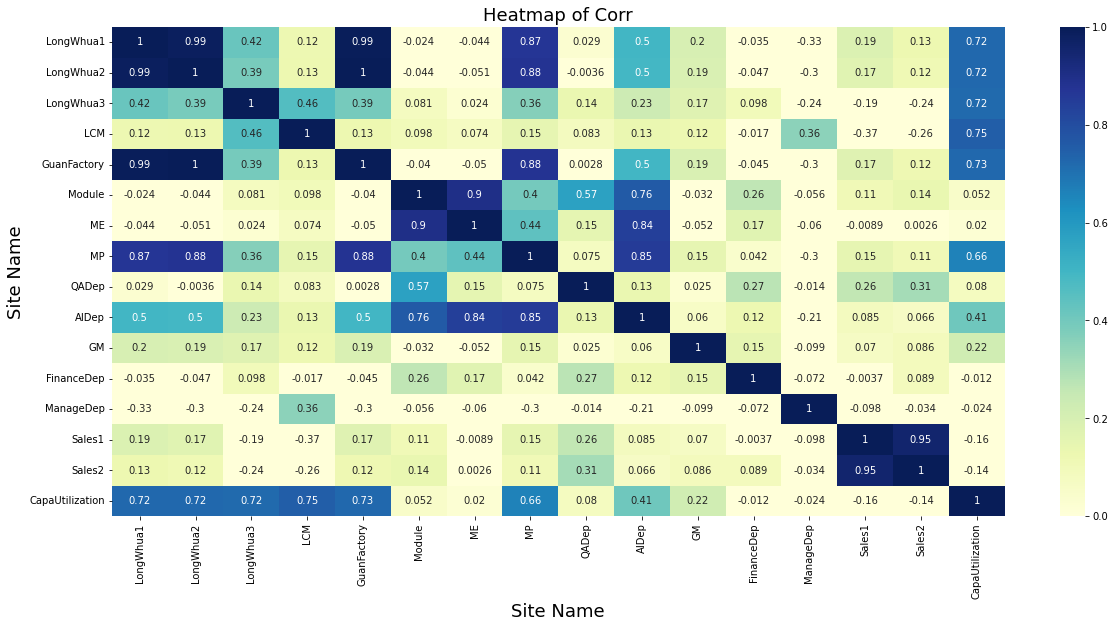

In [103]:
fig, ax = plt.subplots(figsize = (20,9)) #熱力圖顯示比例

sns.heatmap(pd.DataFrame(df1.corr()),
                        annot=True, vmax=1,vmin = 0, xticklabels= True,
                        yticklabels= True, square=False, cmap="YlGnBu")

ax.set_title('Heatmap of Corr', fontsize = 18)
ax.set_ylabel('Site Name', fontsize = 18)
ax.set_xlabel('Site Name', fontsize = 18)      #横軸成縱軸，跟矩陣原始一樣
plt.savefig('factory/output.png')
plt.show()